In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.font_manager as fm
path = 'C:\\Users\\myksh\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf'
# path = 'C:\\Users\\myksh\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf'
font_name = fm.FontProperties(fname=path).get_name()
print(font_name)
plt.rc('font', family=font_name)

plt.rcParams['font.family'] = 'NanumGothic'

#마이너스가 깨질 것을 방지
plt.rcParams['axes.unicode_minus'] = False

from tqdm.notebook import tqdm

NanumGothic


# 음식 list, 대분류 dic

In [6]:
big_list = os.listdir('./data/kfood/')
small_dic = {}
count = 0
for i in big_list:
    for j in os.listdir(f'./data/kfood/{i}'):
        small_dic[j] = i

print(len(small_dic))

food_list = list(small_dic.keys())
food_list

82


['가지구이',
 '갈비구이',
 '고등어구이',
 '닭갈비',
 '떡갈비',
 '불고기',
 '삼겹살구이',
 '장어구이',
 '쪽갈비구이',
 '훈제오리',
 '떡국',
 '만두국',
 '미역국',
 '해장국',
 '고르곤졸라피자',
 '마르게리타피자',
 '양념치킨',
 '치즈피자',
 '콤비네이션피자',
 '후라이드치킨',
 '깍두기',
 '배추김치',
 '숙주나물',
 '시금치나물',
 '애호박볶음',
 '경단',
 '송편',
 '군만두',
 '찐만두',
 '냉면',
 '라면',
 '비빔국수',
 '비빔냉면',
 '우동',
 '짜장면',
 '짬뽕',
 '콩국수',
 '잡채',
 '회무침',
 '김밥',
 '김치볶음밥',
 '비빔밥',
 '새우볶음밥',
 '알밥',
 '오므라이스',
 '유부초밥',
 '잡곡밥',
 '주먹밥',
 '카레라이스',
 '감자채볶음',
 '건새우볶음',
 '고추장진미채볶음',
 '두부김치',
 '떡볶이',
 '소세지볶음',
 '제육볶음',
 '쭈꾸미볶음',
 '보쌈',
 '게장',
 '고추장아찌',
 '마늘장아찌',
 '달걀말이',
 '달걀후라이',
 '생선전',
 '파전',
 '곱창전골',
 '장조림',
 '흰죽',
 '김치찌개',
 '된장찌개',
 '부대찌개',
 '갈비찜',
 '닭찜',
 '순대',
 '족발',
 '해물찜',
 '삼계탕',
 '감자튀김',
 '모듬튀김',
 '새우튀김',
 '한과',
 '육회']

In [3]:
ori_list = ['시금치나물', '애호박볶음', '유부초밥', '감자채볶음', '건새우볶음', '고추장진미채볶음',
            '두부김치', '소세지볶음', '제육볶음', '생선전', '장조림']

add_list = list(set(food_list) - set(ori_list))
add_list

['게장']

# Bounding Box 그리기 (건강관리 이미지)
- 현재 이 데이터에 존재하는 annotation은 YOLO format을 따르고 있음
- Bounding box를 그리기 위해 coco format으로 변경 후 그려준다.

In [4]:
i = '김밥'

image_path = f'./data/final/{small_dic[i]}/{i}/image/'
# label_path = f'./data/final/{small_dic[i]}/{i}/label/'
label_path = f'./data/건강관리이미지/final_label/{i}/'
random_imagepath = np.random.choice(os.listdir(image_path))

with open(f'{label_path}{random_imagepath[:-4]}.json', "r") as f:
    file = json.load(f)[0]
file

{'Code Name': 'B010604XX_11758.jpg',
 'Name': 'gimbab',
 'W': '0.680246913580247',
 'H': '0.444444444444444',
 'File Format': 'jpg',
 'Cat 1': '01',
 'Cat 2': '06',
 'Cat 3': '04',
 'Cat 4': 'xx',
 'Annotation Type': 'binding',
 'Point(x,y)': '0.340740740740741,0.351440329218107',
 'Label': '0',
 'Serving Size': 'xx',
 'Camera Angle': 'xx',
 'Cardinal Angle': 'xx',
 'Color of Container': 'xx',
 'Material of Container': 'xx',
 'Illuminance': 'xx'}

In [5]:
random_imagepath

'B010604XX_11758.jpg'

In [6]:
x_center = float(file['Point(x,y)'].split(',')[0]) * image_input.shape[1]
y_center = float(file['Point(x,y)'].split(',')[1]) * image_input.shape[0]

y_width = float(file['W'])
y_height = float(file['H'])

coco_width = y_width * image_input.shape[1]
coco_height = y_height * image_input.shape[0]
print(coco_width, coco_height)

coco_x = x_center - (coco_width / 2)
coco_y = y_center - (coco_height / 2)

print(coco_x, coco_y)

NameError: name 'image_input' is not defined

In [ ]:
image_name = file['Code Name']
print('image_name :: ',image_name)

#이미지 그리기

filePath = image_path + image_name
stream = open(filePath.encode("utf-8") , "rb") 
bytes = bytearray(stream.read()) 
numpyArray = np.asarray(bytes, dtype=np.uint8) 
image_input = cv2.imdecode(numpyArray , cv2.IMREAD_UNCHANGED)

#Bounding Box 그리기
x_center = float(file['Point(x,y)'].split(',')[0]) * image_input.shape[1]
y_center = float(file['Point(x,y)'].split(',')[1]) * image_input.shape[0]

y_width = float(file['W'])
y_height = float(file['H'])

coco_width = y_width * image_input.shape[1]
coco_height = y_height * image_input.shape[0]
print(coco_width, coco_height)

coco_x = x_center - (coco_width / 2)
coco_y = y_center - (coco_height / 2)

print(coco_x, coco_y)


cv2.rectangle(image_input, (int(coco_x), int(coco_y)), (int(coco_x+coco_width), int(coco_y+coco_height)),(0,255,0), 10) 


plt.title(f'{i} {image_input.shape}')
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))

In [7]:
all_list = ['갈비구이','고등어구이','닭갈비','삼겹살구이','양념치킨','후라이드치킨','경단','냉면','김밥',
              '김치볶음밥','비빔밥','새우볶음밥','쭈꾸미볶음','보쌈','달걀말이','달걀후라이','김치찌개','닭찜','삼계탕','새우튀김',
           '가지구이','오므라이스','카레라이스','감자튀김','고추장아찌','마늘장아찌','부대찌개','떡국','만두국','게장']
small_dic['삼겹살구이'] = '구이'
small_dic['냉면'] = '면'
small_dic['달걀말이'] = '전'
small_dic['달걀후라이'] = '전'
small_dic['닭찜'] = '찜'
small_dic['쭈꾸미볶음'] = '볶음'

image_name ::  B080202XX_00515.jpg
image_name ::  B080105XX_00944.jpg
image_name ::  B100510XX_10799.jpg
image_name ::  B080249XX_11424.jpg
image_name ::  B120227XX_00865.jpg
image_name ::  B120239XX_01223.jpg
image_name ::  A240228XX_02331.jpg
image_name ::  B030301XX_10981.jpg
image_name ::  B010604XX_11503.jpg
image_name ::  B010407XX_11794.jpg
image_name ::  B010316XX_10217.jpg
image_name ::  B010451XX_01126.jpg
image_name ::  B100409_10920.jpg
image_name ::  B070220XX_11592.jpg
image_name ::  B090316_50410.jpg
image_name ::  B090319XX_03413.jpg
image_name ::  B060103XX_10879.jpg
image_name ::  B070204XX_11112.jpg
image_name ::  B050318XX_11151.jpg
image_name ::  B120116XX_02173.jpg
image_name ::  B080302XX_10660.jpg
image_name ::  B011003XX_01208.jpg
image_name ::  B010533XX_10256.jpg
image_name ::  B120303XX_01232.jpg
image_name ::  B170102XX_10217.jpg
image_name ::  B170110XX_11434.jpg
image_name ::  B060512XX_10247.jpg
image_name ::  B031204XX_01375.jpg
image_name ::  B031113XX

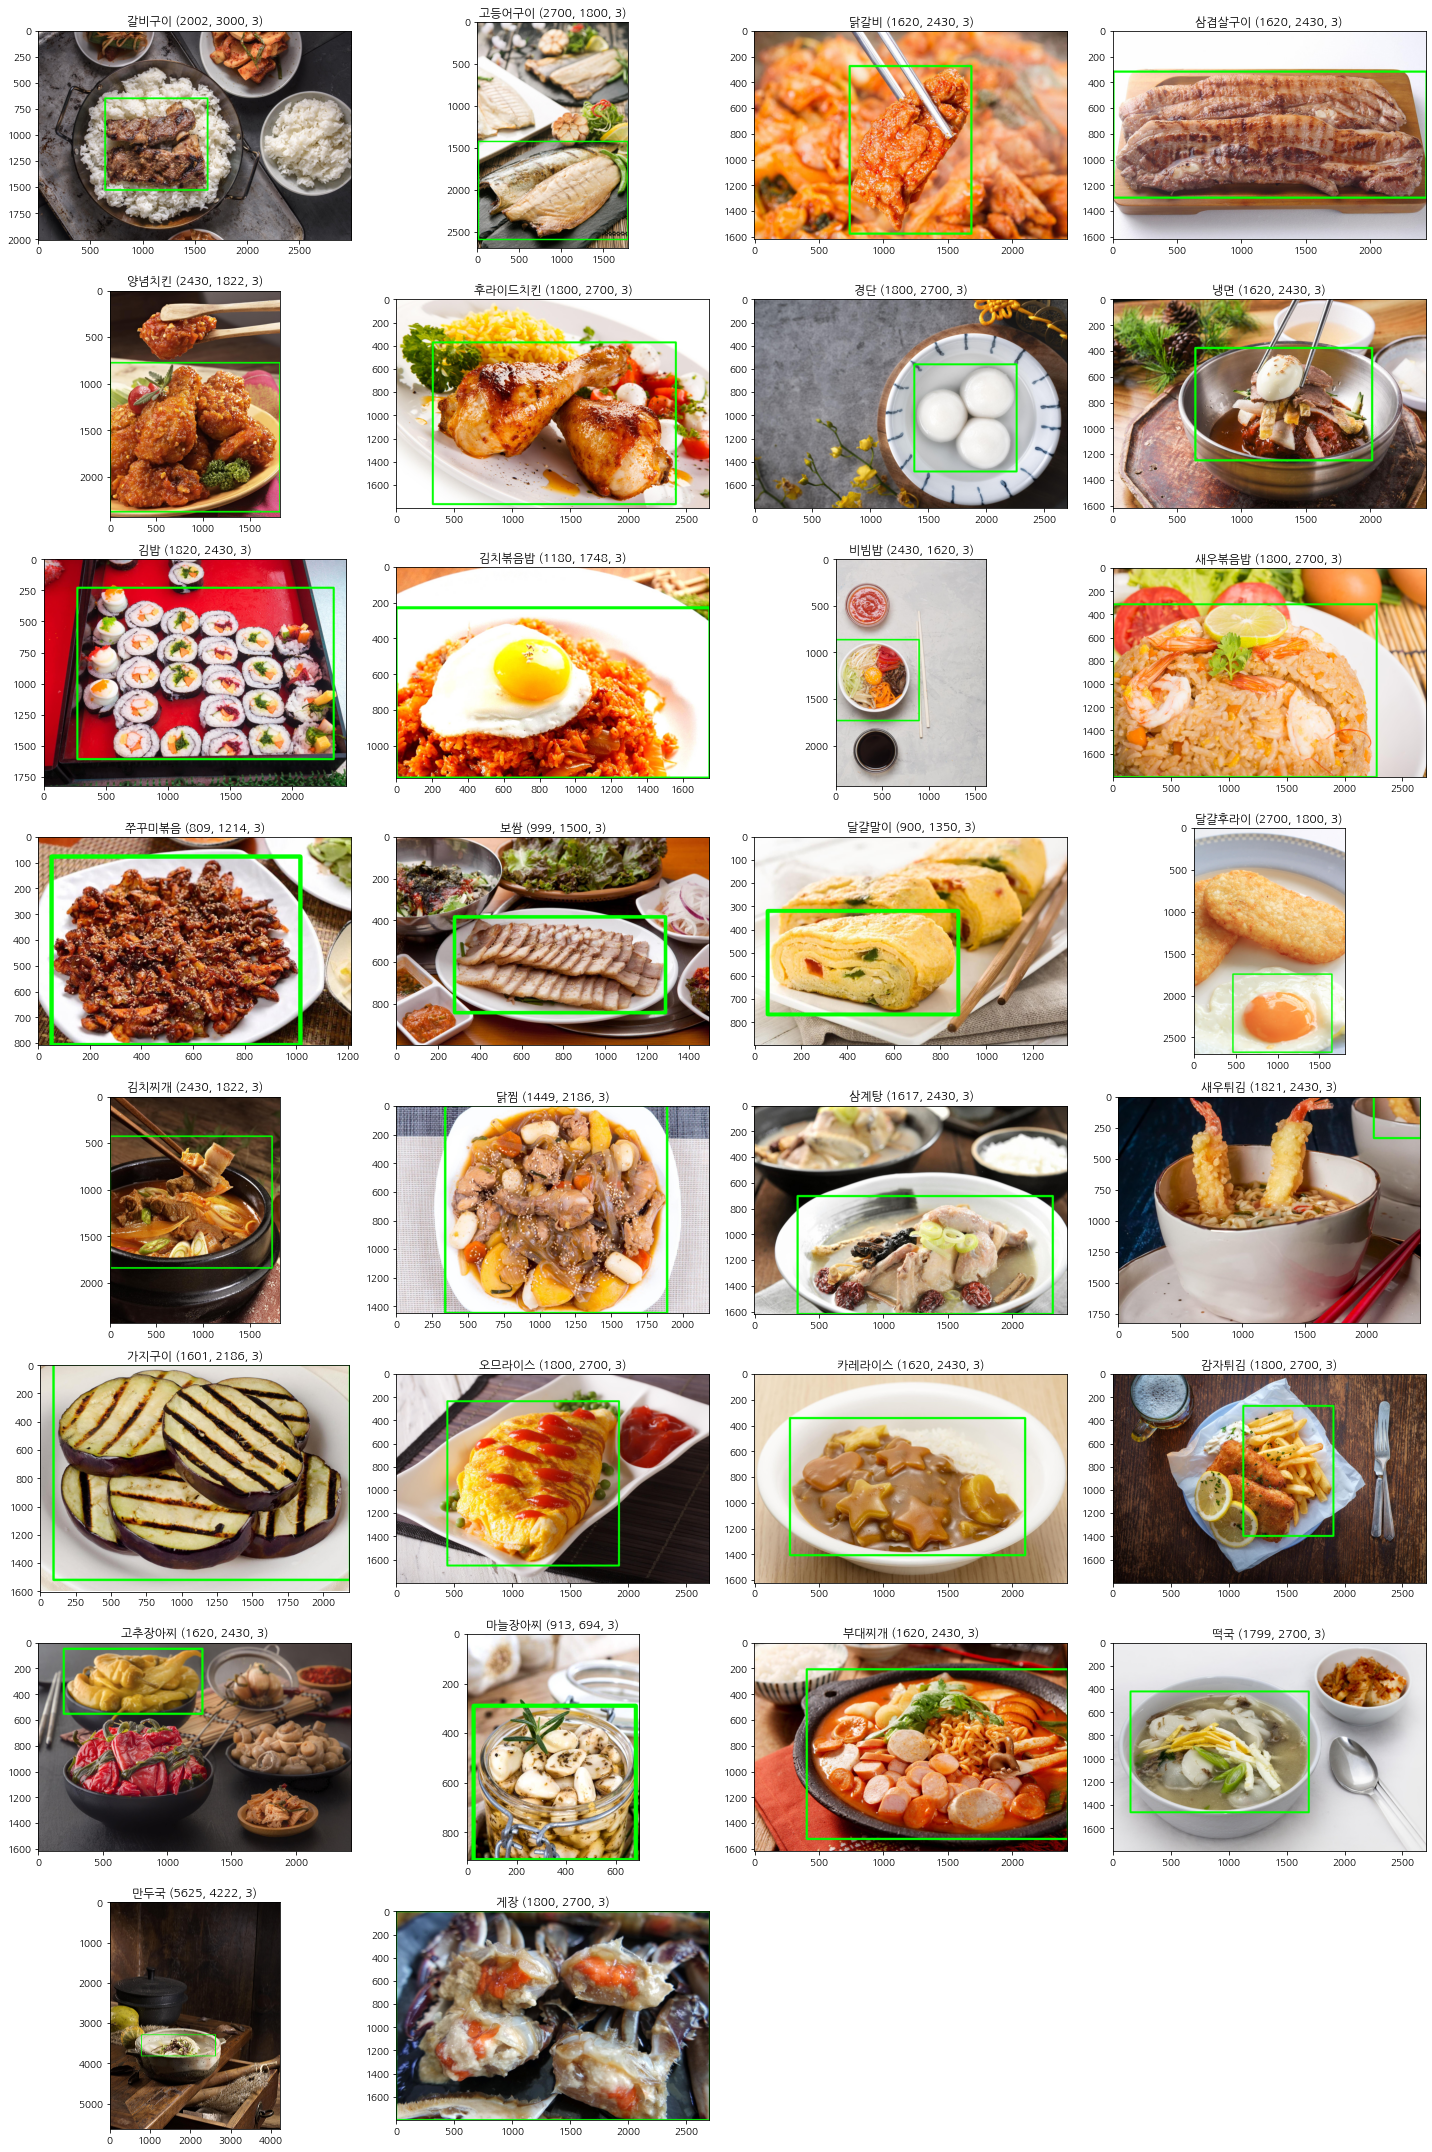

In [8]:
plt.figure(figsize = (20,30))
idx = 0

for i in all_list:
    plt.subplot(8,4,1+idx)
    image_path = f'./data/final/{small_dic[i]}/{i}/image/'
    label_path = f'./data/final/{small_dic[i]}/{i}/label/'
#     label_path = f'./data/건강관리이미지/final_label/{i}/'
    random_imagepath = np.random.choice(os.listdir(image_path))
    with open(f'{label_path}{random_imagepath[:-4]}.json', "r") as f:
        file = json.load(f)[0]
        
    image_name = file['Code Name']
    print('image_name :: ',image_name)

    #이미지 그리기

    filePath = image_path + image_name
    stream = open(filePath.encode("utf-8") , "rb") 
    bytes = bytearray(stream.read()) 
    numpyArray = np.asarray(bytes, dtype=np.uint8) 
    image_input = cv2.imdecode(numpyArray , cv2.IMREAD_UNCHANGED)

    #Bounding Box 그리기
    x_center = float(file['Point(x,y)'].split(',')[0]) * image_input.shape[1]
    y_center = float(file['Point(x,y)'].split(',')[1]) * image_input.shape[0]

    y_width = float(file['W'])
    y_height = float(file['H'])

    coco_width = y_width * image_input.shape[1]
    coco_height = y_height * image_input.shape[0]
#     print(coco_width, coco_height)

    coco_x = x_center - (coco_width / 2)
    coco_y = y_center - (coco_height / 2)

#     print(coco_x, coco_y)

    cv2.rectangle(image_input, (int(coco_x), int(coco_y)), (int(coco_x+coco_width), int(coco_y+coco_height)),(0,255,0), 15) 


    plt.title(f'{i} {image_input.shape}')
    plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
    idx+=1

plt.tight_layout()

In [9]:
for i in all_list:
    image_path = f'./data/final/{small_dic[i]}/{i}/image/'
    label_path = f'./data/final/{small_dic[i]}/{i}/label/'
    images = list(map(lambda x:x[:-4], os.listdir(image_path)))
    labels = list(map(lambda x:x[:-5], os.listdir(label_path)))
    print(i)
    print(len(images), len(labels))
    print(set(images) - set(labels))
    print(set(labels) - set(images))
    print('------------------------------------------------------')

갈비구이
1100 1100
set()
set()
------------------------------------------------------
고등어구이
1100 1100
set()
set()
------------------------------------------------------
닭갈비
1099 1099
set()
set()
------------------------------------------------------
삼겹살구이
1100 1100
set()
set()
------------------------------------------------------
양념치킨
1100 1100
set()
set()
------------------------------------------------------
후라이드치킨
1100 1100
set()
set()
------------------------------------------------------
경단
1100 1100
set()
set()
------------------------------------------------------
냉면
1100 1100
set()
set()
------------------------------------------------------
김밥
1100 1100
set()
set()
------------------------------------------------------
김치볶음밥
1100 1100
set()
set()
------------------------------------------------------
비빔밥
1100 1100
set()
set()
------------------------------------------------------
새우볶음밥
1100 1100
set()
set()
------------------------------------------------------
쭈꾸미볶음
1100 1100
se

# Class df 생성

In [7]:
result = []
for category in os.listdir('./data/kfood/'):
    for i in os.listdir(f'./data/kfood/{category}/'):
        result.append(i)
result, len(result)

(['가지구이',
  '갈비구이',
  '고등어구이',
  '닭갈비',
  '떡갈비',
  '불고기',
  '삼겹살구이',
  '장어구이',
  '쪽갈비구이',
  '훈제오리',
  '떡국',
  '만두국',
  '미역국',
  '해장국',
  '고르곤졸라피자',
  '마르게리타피자',
  '양념치킨',
  '치즈피자',
  '콤비네이션피자',
  '후라이드치킨',
  '깍두기',
  '배추김치',
  '숙주나물',
  '시금치나물',
  '애호박볶음',
  '경단',
  '송편',
  '군만두',
  '찐만두',
  '냉면',
  '라면',
  '비빔국수',
  '비빔냉면',
  '우동',
  '짜장면',
  '짬뽕',
  '콩국수',
  '잡채',
  '회무침',
  '김밥',
  '김치볶음밥',
  '비빔밥',
  '새우볶음밥',
  '알밥',
  '오므라이스',
  '유부초밥',
  '잡곡밥',
  '주먹밥',
  '카레라이스',
  '감자채볶음',
  '건새우볶음',
  '고추장진미채볶음',
  '두부김치',
  '떡볶이',
  '소세지볶음',
  '제육볶음',
  '쭈꾸미볶음',
  '보쌈',
  '게장',
  '고추장아찌',
  '마늘장아찌',
  '달걀말이',
  '달걀후라이',
  '생선전',
  '파전',
  '곱창전골',
  '장조림',
  '흰죽',
  '김치찌개',
  '된장찌개',
  '부대찌개',
  '갈비찜',
  '닭찜',
  '순대',
  '족발',
  '해물찜',
  '삼계탕',
  '감자튀김',
  '모듬튀김',
  '새우튀김',
  '한과',
  '육회'],
 82)

In [8]:
import pandas as pd
class_df = pd.DataFrame(result, columns=['name']).sort_values('name').reset_index(drop=True)
class_df.index.name = 'class'
class_df = class_df.reset_index()
# class_df.to_csv('./class_df.csv', index=False)

In [9]:
class_df

class    name
0       0    가지구이
1       1    갈비구이
2       2     갈비찜
3       3   감자채볶음
4       4    감자튀김
..    ...     ...
77     77     해장국
78     78     회무침
79     79  후라이드치킨
80     80    훈제오리
81     81      흰죽

[82 rows x 2 columns]

# Preparing Annotation file
- coco format (properties 파일) - [ top_left_x, top_left_y, width, height ]
- yolo format - [ class center_x, center_y, width, height ]


## properties file

In [24]:
from PIL import Image

#이미지 shape 가져오는 함수
def get_image_shape(path):
    image_input = Image.open(path)
    try:
        return (image_input.size[0], image_input.size[1], 3)
    except AttributeError:
        print('error : ', path)
        return (None, None, None)
    
#properties의 coco format을 yolo format으로 변환시켜주는 함수
def coco_to_yolo(img_path, x, y, w, h):
    image_shape = get_image_shape(img_path)
    x_center = (x + (w/2)) / image_shape[1]
    y_center = (y + (h/2)) / image_shape[0]
    width = w / image_shape[1]
    height = h / image_shape[0]
    return x_center, y_center, width, height

#properties 파일일 때 annotation 작성하는 함수
def if_properties(filepath, class_number):
    with open(filepath + 'crop_area.properties', 'r') as f:
        content = f.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        for i in content_list:
            temp = filepath.split('label')[0]
            food_name = i.split('=')[0]
            img_path = f'{temp}image/{food_name}.jpg'
            x, y, w, h = i.split('=')[1].split(',')
            x_center, y_center, width, height = coco_to_yolo(img_path, int(x), int(y), int(w), int(h))
            with open(f'./data/test/{food_name}.txt', 'w') as ff:
                ff.write(f'{class_number} {x_center} {y_center} {width} {height} ')

In [26]:
# filepath = './data/kfood/나물/숙주나물/label/'
# with open(filepath + 'crop_area.properties', 'r') as f:
#     content = f.read()
#     #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
#     content_list = content.split('\n')[:-1]
#     for i in content_list:
#         temp = filepath.split('label')[0]
#         food_name = i.split('=')[0]
#         img_path = f'{temp}image/{food_name}.jpg'
#         x, y, w, h = i.split('=')[1].split(',')
#         print(i)
#         x_center, y_center, width, height = coco_to_yolo(img_path, int(x), int(y), int(w), int(h))

Img_043_0000=156,63,584,435
Img_043_0001=146,91,577,399
Img_043_0002=158,20,405,391
Img_043_0004=189,110,398,328
Img_043_0005=191,110,374,338
Img_043_0006=22,22,431,309
Img_043_0007=60,39,532,345
Img_043_0008=6,17,175,161
Img_043_0010=39,18,577,431
Img_043_0011=30,24,528,357
Img_043_0012=6,11,549,421
Img_043_0014=25,11,605,424
Img_043_0015=12,6,583,329
Img_043_0016=52,12,549,411
Img_043_0017=11,208,638,643
Img_043_0018=25,25,596,447
Img_043_0019=27,30,558,386
Img_043_0020=5,160,645,743
Img_043_0021=100,30,338,353
Img_043_0023=170,79,490,343
Img_043_0025=61,52,584,334
Img_043_0026=111,49,480,357
Img_043_0027=14,72,626,483
Img_043_0029=118,60,479,372
Img_043_0030=196,99,422,338
Img_043_0031=163,105,450,317
Img_043_0035=108,150,510,304
Img_043_0036=70,26,632,410
Img_043_0037=194,157,248,160
Img_043_0039=58,57,454,375
Img_043_0041=158,95,439,336
Img_043_0042=89,67,517,420
Img_043_0043=20,163,473,470
Img_043_0046=200,53,523,493
Img_043_0047=136,71,324,258
Img_043_0049=90,56,455,432
Img_043_

Img_043_0416=107,7,472,310
Img_043_0417=137,87,325,237
Img_043_0418=174,50,391,296
Img_043_0419=120,53,347,275
Img_043_0420=8,5,497,337
Img_043_0421=103,28,385,360
Img_043_0422=0,14,625,335
Img_043_0423=107,127,321,229
Img_043_0425=112,27,420,297
Img_043_0426=89,13,441,352
Img_043_0427=77,54,370,230
Img_043_0428=182,77,284,252
Img_043_0429=241,146,272,168
Img_043_0430=56,14,356,336
Img_043_0431=80,15,400,308
Img_043_0432=97,93,384,197
Img_043_0433=132,145,264,220
Img_043_0434=119,72,384,265
Img_043_0435=110,99,377,234
Img_043_0436=89,18,475,382
Img_043_0437=73,134,175,157
Img_043_0438=87,63,392,337
Img_043_0439=98,71,394,329
Img_043_0440=64,46,494,324
Img_043_0441=0,81,267,265
Img_043_0442=95,28,470,372
Img_043_0443=0,84,262,244
Img_043_0444=30,0,465,377
Img_043_0445=133,74,281,191
Img_043_0446=102,0,296,320
Img_043_0447=91,18,318,300
Img_043_0448=53,59,385,305
Img_043_0449=90,53,365,283
Img_043_0450=216,76,241,223
Img_043_0452=118,54,387,272
Img_043_0454=114,146,392,216
Img_043_0455=6

Img_043_0764=7,122,247,163
Img_043_0765=133,21,464,379
Img_043_0766=135,30,378,341
Img_043_0767=51,9,498,323
Img_043_0770=108,71,354,249
Img_043_0771=87,66,371,271
Img_043_0772=122,79,373,221
Img_043_0773=169,10,354,314
Img_043_0774=109,71,440,272
Img_043_0775=174,147,340,200
Img_043_0776=13,75,255,280
Img_043_0778=0,98,338,253
Img_043_0779=31,69,224,213
Img_043_0780=0,98,267,236
Img_043_0781=11,35,256,286
Img_043_0782=84,88,310,248
Img_043_0783=124,65,372,281
Img_043_0784=47,149,220,183
Img_043_0785=99,27,410,318
Img_043_0786=156,78,314,205
Img_043_0787=171,89,315,244
Img_043_0789=112,48,429,292
Img_043_0790=130,113,338,214
Img_043_0791=180,88,299,301
Img_043_0792=42,136,224,203
Img_043_0793=153,88,412,228
Img_043_0794=71,119,185,174
Img_043_0795=146,46,312,261
Img_043_0796=89,30,452,321
Img_043_0797=1,52,267,253
Img_043_0798=25,40,347,334
Img_043_0799=27,25,449,335
Img_043_0800=75,51,342,269
Img_043_0801=49,89,219,210
Img_043_0802=162,71,269,156
Img_043_0803=212,17,462,308
Img_043_08

In [52]:
# with open('./data/final/볶음/감자채볶음/label/crop_area.properties', 'r') as f:
#     content = f.read()
#     #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
#     content_list = content.split('\n')[:-1]
#     for i in content_list:
#         img_name = i.split('=')[0]
#         img_path = './data/final/볶음/감자채볶음/image/' + img_name +'.jpg'
#         print(img_path)
#         x, y, w, h = i.split('=')[1].split(',')
#         x_center, y_center, width, height = coco_to_yolo(img_path, int(x), int(y), int(w), int(h))
#         with open(f'./data/test/{img_name}.txt', 'w') as ff:
#             ff.write(f'{img_name} {x_center} {y_center} {width} {height} ')

./data/final/볶음/감자채볶음/image/Img_078_0000.jpg
./data/final/볶음/감자채볶음/image/Img_078_0001.jpg
./data/final/볶음/감자채볶음/image/Img_078_0002.jpg
./data/final/볶음/감자채볶음/image/Img_078_0003.jpg
./data/final/볶음/감자채볶음/image/Img_078_0004.jpg
./data/final/볶음/감자채볶음/image/Img_078_0005.jpg
./data/final/볶음/감자채볶음/image/Img_078_0007.jpg
./data/final/볶음/감자채볶음/image/Img_078_0008.jpg
./data/final/볶음/감자채볶음/image/Img_078_0009.jpg
./data/final/볶음/감자채볶음/image/Img_078_0010.jpg
./data/final/볶음/감자채볶음/image/Img_078_0011.jpg
./data/final/볶음/감자채볶음/image/Img_078_0012.jpg
./data/final/볶음/감자채볶음/image/Img_078_0014.jpg
./data/final/볶음/감자채볶음/image/Img_078_0015.jpg
./data/final/볶음/감자채볶음/image/Img_078_0016.jpg
./data/final/볶음/감자채볶음/image/Img_078_0017.jpg
./data/final/볶음/감자채볶음/image/Img_078_0018.jpg
./data/final/볶음/감자채볶음/image/Img_078_0019.jpg
./data/final/볶음/감자채볶음/image/Img_078_0020.jpg
./data/final/볶음/감자채볶음/image/Img_078_0021.jpg
./data/final/볶음/감자채볶음/image/Img_078_0022.jpg
./data/final/볶음/감자채볶음/image/Img_078_0023.jpg
./data/fin

./data/final/볶음/감자채볶음/image/Img_078_0219.jpg
./data/final/볶음/감자채볶음/image/Img_078_0220.jpg
./data/final/볶음/감자채볶음/image/Img_078_0223.jpg
./data/final/볶음/감자채볶음/image/Img_078_0225.jpg
./data/final/볶음/감자채볶음/image/Img_078_0226.jpg
./data/final/볶음/감자채볶음/image/Img_078_0227.jpg
./data/final/볶음/감자채볶음/image/Img_078_0230.jpg
./data/final/볶음/감자채볶음/image/Img_078_0231.jpg
./data/final/볶음/감자채볶음/image/Img_078_0232.jpg
./data/final/볶음/감자채볶음/image/Img_078_0233.jpg
./data/final/볶음/감자채볶음/image/Img_078_0235.jpg
./data/final/볶음/감자채볶음/image/Img_078_0236.jpg
./data/final/볶음/감자채볶음/image/Img_078_0237.jpg
./data/final/볶음/감자채볶음/image/Img_078_0238.jpg
./data/final/볶음/감자채볶음/image/Img_078_0239.jpg
./data/final/볶음/감자채볶음/image/Img_078_0240.jpg
./data/final/볶음/감자채볶음/image/Img_078_0241.jpg
./data/final/볶음/감자채볶음/image/Img_078_0242.jpg
./data/final/볶음/감자채볶음/image/Img_078_0244.jpg
./data/final/볶음/감자채볶음/image/Img_078_0245.jpg
./data/final/볶음/감자채볶음/image/Img_078_0246.jpg
./data/final/볶음/감자채볶음/image/Img_078_0247.jpg
./data/fin

./data/final/볶음/감자채볶음/image/Img_078_0425.jpg
./data/final/볶음/감자채볶음/image/Img_078_0426.jpg
./data/final/볶음/감자채볶음/image/Img_078_0427.jpg
./data/final/볶음/감자채볶음/image/Img_078_0428.jpg
./data/final/볶음/감자채볶음/image/Img_078_0429.jpg
./data/final/볶음/감자채볶음/image/Img_078_0430.jpg
./data/final/볶음/감자채볶음/image/Img_078_0431.jpg
./data/final/볶음/감자채볶음/image/Img_078_0432.jpg
./data/final/볶음/감자채볶음/image/Img_078_0433.jpg
./data/final/볶음/감자채볶음/image/Img_078_0434.jpg
./data/final/볶음/감자채볶음/image/Img_078_0435.jpg
./data/final/볶음/감자채볶음/image/Img_078_0436.jpg
./data/final/볶음/감자채볶음/image/Img_078_0437.jpg
./data/final/볶음/감자채볶음/image/Img_078_0438.jpg
./data/final/볶음/감자채볶음/image/Img_078_0439.jpg
./data/final/볶음/감자채볶음/image/Img_078_0440.jpg
./data/final/볶음/감자채볶음/image/Img_078_0441.jpg
./data/final/볶음/감자채볶음/image/Img_078_0442.jpg
./data/final/볶음/감자채볶음/image/Img_078_0443.jpg
./data/final/볶음/감자채볶음/image/Img_078_0444.jpg
./data/final/볶음/감자채볶음/image/Img_078_0445.jpg
./data/final/볶음/감자채볶음/image/Img_078_0446.jpg
./data/fin

./data/final/볶음/감자채볶음/image/Img_078_0628.jpg
./data/final/볶음/감자채볶음/image/Img_078_0629.jpg
./data/final/볶음/감자채볶음/image/Img_078_0630.jpg
./data/final/볶음/감자채볶음/image/Img_078_0631.jpg
./data/final/볶음/감자채볶음/image/Img_078_0633.jpg
./data/final/볶음/감자채볶음/image/Img_078_0634.jpg
./data/final/볶음/감자채볶음/image/Img_078_0635.jpg
./data/final/볶음/감자채볶음/image/Img_078_0636.jpg
./data/final/볶음/감자채볶음/image/Img_078_0637.jpg
./data/final/볶음/감자채볶음/image/Img_078_0640.jpg
./data/final/볶음/감자채볶음/image/Img_078_0641.jpg
./data/final/볶음/감자채볶음/image/Img_078_0642.jpg
./data/final/볶음/감자채볶음/image/Img_078_0643.jpg
./data/final/볶음/감자채볶음/image/Img_078_0644.jpg
./data/final/볶음/감자채볶음/image/Img_078_0645.jpg
./data/final/볶음/감자채볶음/image/Img_078_0646.jpg
./data/final/볶음/감자채볶음/image/Img_078_0647.jpg
./data/final/볶음/감자채볶음/image/Img_078_0648.jpg
./data/final/볶음/감자채볶음/image/Img_078_0649.jpg
./data/final/볶음/감자채볶음/image/Img_078_0650.jpg
./data/final/볶음/감자채볶음/image/Img_078_0651.jpg
./data/final/볶음/감자채볶음/image/Img_078_0652.jpg
./data/fin

./data/final/볶음/감자채볶음/image/Img_078_0835.jpg
./data/final/볶음/감자채볶음/image/Img_078_0836.jpg
./data/final/볶음/감자채볶음/image/Img_078_0837.jpg
./data/final/볶음/감자채볶음/image/Img_078_0838.jpg
./data/final/볶음/감자채볶음/image/Img_078_0839.jpg
./data/final/볶음/감자채볶음/image/Img_078_0841.jpg
./data/final/볶음/감자채볶음/image/Img_078_0842.jpg
./data/final/볶음/감자채볶음/image/Img_078_0843.jpg
./data/final/볶음/감자채볶음/image/Img_078_0844.jpg
./data/final/볶음/감자채볶음/image/Img_078_0845.jpg
./data/final/볶음/감자채볶음/image/Img_078_0846.jpg
./data/final/볶음/감자채볶음/image/Img_078_0847.jpg
./data/final/볶음/감자채볶음/image/Img_078_0848.jpg
./data/final/볶음/감자채볶음/image/Img_078_0849.jpg
./data/final/볶음/감자채볶음/image/Img_078_0850.jpg
./data/final/볶음/감자채볶음/image/Img_078_0851.jpg
./data/final/볶음/감자채볶음/image/Img_078_0852.jpg
./data/final/볶음/감자채볶음/image/Img_078_0853.jpg
./data/final/볶음/감자채볶음/image/Img_078_0854.jpg
./data/final/볶음/감자채볶음/image/Img_078_0855.jpg
./data/final/볶음/감자채볶음/image/Img_078_0856.jpg
./data/final/볶음/감자채볶음/image/Img_078_0857.jpg
./data/fin

## JSON file

In [28]:
#json 파일일 때 annotation 작성하는 함수
def if_json(filepath, class_number):
    with open(filepath, 'r') as f:
        file = json.load(f)[0]
        img_name = file['Code Name'][:-4]
        x_center, y_center = list(map(float, file['Point(x,y)'].split(',')))
        width, height = float(file['W']), float(file['H'])
    with open(f'./data/test/{img_name}.txt', 'w') as ff:
        ff.write(f'{class_number} {x_center} {y_center} {width} {height} ')

In [30]:
# with open('./data/kfood/구이/갈비구이/label/B080202XX_00001.json', 'r') as f:
#     file = json.load(f)[0]
#     img_name = file['Code Name'][:-4]
#     x_center, y_center = list(map(float, file['Point(x,y)'].split(',')))
#     width, height = float(file['W']), float(file['H'])
# with open(f'./data/test/{img_name}.txt', 'w') as ff:
#     ff.write(f'{img_name} {x_center} {y_center} {width} {height} ')
# x_center, y_center, width, height

(0.5, 0.614815, 1.0, 0.737037)

In [31]:
file

{'Code Name': 'B080202XX_00001.jpg',
 'Name': 'galbigu-i',
 'W': '1.000000',
 'H': '0.737037',
 'File Format': 'jpg',
 'Cat 1': '08',
 'Cat 2': '02',
 'Cat 3': '02',
 'Cat 4': 'xx',
 'Annotation Type': 'binding',
 'Point(x,y)': '0.500000,0.614815',
 'Label': '0',
 'Serving Size': 'xx',
 'Camera Angle': 'xx',
 'Cardinal Angle': 'xx',
 'Color of Container': 'xx',
 'Material of Container': 'xx',
 'Illuminance': 'xx'}

# RUN

In [3]:
big_list = os.listdir('./data/kfood')
small_dic = {}
count = 0
for i in big_list:
    for j in os.listdir(f'./data/kfood/{i}'):
        small_dic[j] = i

len(small_dic)

82

- properties랑 json 둘 다 있을 경우 생각

In [34]:
%%time

for i in tqdm(small_dic.keys()):
    print(i)
    label_path = f'./data/kfood/{small_dic[i]}/{i}/label/'
    for file in os.listdir(label_path):
        label_path1 = label_path + file
        if file.split('.')[-1] == 'properties':
            if_properties(label_path, class_df[class_df['name'] == i]['class'].iloc[0])
        elif file.split('.')[-1] == 'json':
            if_json(label_path + file, class_df[class_df['name'] == i]['class'].iloc[0])
        else:
            print('error!!!!!!', label_path1)

  0%|          | 0/82 [00:00<?, ?it/s]

가지구이
갈비구이
고등어구이
닭갈비
떡갈비
불고기
삼겹살구이
장어구이
쪽갈비구이
훈제오리
떡국
만두국
미역국
해장국
고르곤졸라피자
마르게리타피자
양념치킨
치즈피자
콤비네이션피자
후라이드치킨
깍두기
배추김치
숙주나물
시금치나물
애호박볶음
경단
송편
군만두
찐만두
냉면
라면
비빔국수


FileNotFoundError: [Errno 2] No such file or directory: './data/kfood/면/비빔국수/image/Img_055_0049.jpg'

# 확인

In [4]:
#전체 파일 개수 세기
count_dic = {}
for i in small_dic.keys():
    count_dic[i] = len(os.listdir(f'./data/kfood/{small_dic[i]}/{i}/image'))

In [5]:
#annotation 완료한 파일 개수 세기
len(os.listdir('./test'))

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: './test'

In [36]:
for i in small_dic.keys():
    image_path = f'./data/kfood/{small_dic[i]}/{i}/image/'
    label_path = f'./data/kfood/{small_dic[i]}/{i}/label/'
    images = list(map(lambda x:x[:-4], os.listdir(image_path)))
    labels = list(map(lambda x:x[:-5], os.listdir(label_path)))
    print(i)
    print(len(images), len(labels))
    print(len(set(images) - set(labels)))
    print(set(labels) - set(images))
    print('------------------------------------------------------')

가지구이
1100 1100
0
set()
------------------------------------------------------
갈비구이
1100 1100
0
set()
------------------------------------------------------
고등어구이
1100 1100
0
set()
------------------------------------------------------
닭갈비
1099 1099
0
set()
------------------------------------------------------
떡갈비
1100 1100
0
set()
------------------------------------------------------
불고기
1100 1100
0
set()
------------------------------------------------------
삼겹살구이
1100 1100
0
set()
------------------------------------------------------
장어구이
1100 1100
0
set()
------------------------------------------------------
쪽갈비구이
1100 1100
0
set()
------------------------------------------------------
훈제오리
1100 1100
0
set()
------------------------------------------------------
떡국
1100 1100
0
set()
------------------------------------------------------
만두국
1100 1100
0
set()
------------------------------------------------------
미역국
820 766
55
{'crop_area.prope'}
--------------------------------